In [4]:
import numpy as np
from matplotlib import lines, pyplot as plt

minf = 0
inf = 10
steps = plt.step([minf, 2, 5, 8, inf], [1, 1, 3, 4, 4], where="mid")
plt.show()

<Figure size 640x480 with 1 Axes>

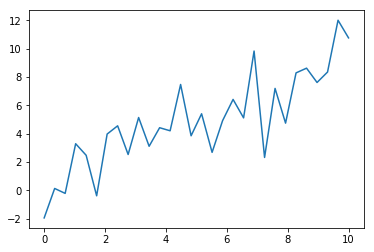

In [5]:
n = 30
xis = np.linspace(0, 10, n)
yis = xis + 2*np.random.normal(size=n)

plt.plot(xis, yis)
plt.show()

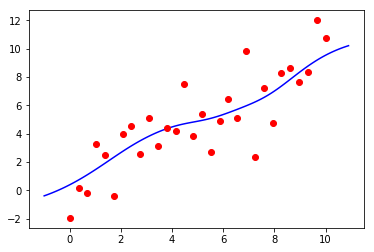

In [6]:
def f(x):
    return np.exp(-0.5*np.square(x))/np.sqrt(2*np.pi)

xs = np.arange(-1, 11, 0.1)
ys = []
for x in xs:
    y = 0
    w = 0
    for (xi, yi) in zip(xis, yis):
        wi = f(x - xi)
        y = y + yi*wi
        w = w + wi
    ys.append(y/w)

    
plt.plot(xs, ys, 'b')
plt.plot(xis, yis, 'ro')
plt.show()

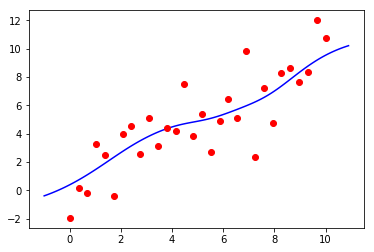

In [7]:
ys = []
for x in xs:
    ws = f(x - xis)
    y = yis.dot(ws)/sum(ws)
    ys.append(y)

plt.plot(xs, ys, 'b')
plt.plot(xis, yis, 'ro')
plt.show()

(120, 30)


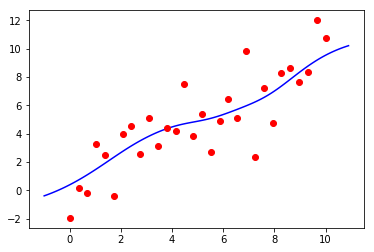

In [8]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


ws = np.array([f(x - xis) for x in xs])
print(ws.shape)
ys = np.sum(ws*yis, axis=1)/np.sum(ws, axis=1)

plt.plot(xs, ys, 'b')
plt.plot(xis, yis, 'ro')
plt.show()

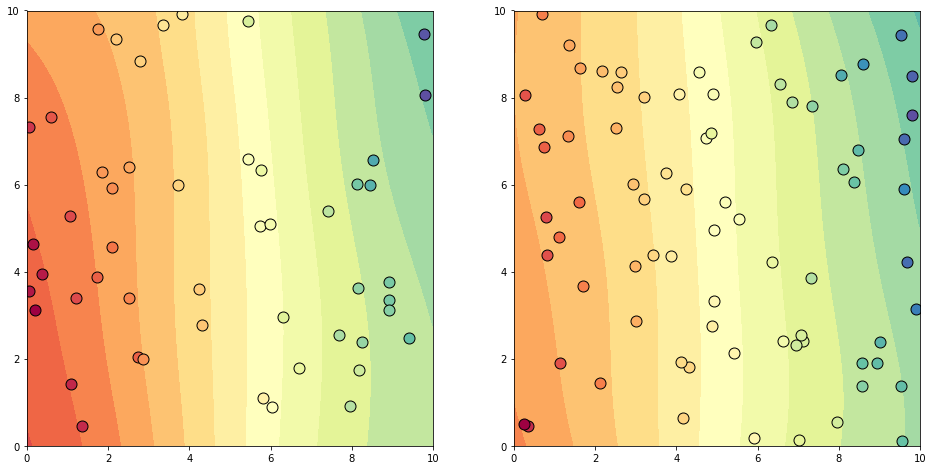

In [9]:
np.random.seed(100)

N = 50

xis = np.random.uniform(0, 10, size=N)
yis = np.random.uniform(0, 10, size=N)
zis = 2*xis + 0.4*yis + 0.5*np.random.normal(size=xis.shape)

Xis, Yis = np.meshgrid(xis, yis)

xs = np.arange(0, 10, 0.01)
ys = np.arange(0, 10, 0.01)
Xs, Ys = np.meshgrid(xs, ys)

zmin = np.min(zis)
zmax = np.max(zis)
zis_normalized = (zis - zmin)/(zmax - zmin)

wis = np.array([f(0.05*((Xs - xi)**2 + (Ys - yi)**2)) for (xi, yi) in zip(xis, yis)])
num = wis*zis.reshape((N, 1, 1))
Zs = num.sum(axis=0)/wis.sum(axis=0)

fig = plt.figure(figsize=(16, 8))

ax1, ax2 = fig.subplots(1, 2)
cmap=cm.get_cmap('Spectral')

# f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.contourf(Xs, Ys, Zs, np.linspace(np.min(zis), np.max(zis), 20), cmap=cmap)
for (xi, yi, zi) in zip(xis, yis, zis_normalized):
    ax1.plot([xi], [yi], 'o', markersize=11, markeredgecolor='k', color=cmap(zi))


N = 75

xis = np.random.uniform(0, 10, size=N)
yis = np.random.uniform(0, 10, size=N)
zis = 2*xis + 0.4*yis + 0.5*np.random.normal(size=xis.shape)

Xis, Yis = np.meshgrid(xis, yis)

xs = np.arange(0, 10, 0.01)
ys = np.arange(0, 10, 0.01)
Xs, Ys = np.meshgrid(xs, ys)

zmin = np.min(zis)
zmax = np.max(zis)
zis_normalized = (zis - zmin)/(zmax - zmin)

wis = np.array([f(0.05*((Xs - xi)**2 + (Ys - yi)**2)) for (xi, yi) in zip(xis, yis)])
num = wis*zis.reshape((N, 1, 1))
Zs = num.sum(axis=0)/wis.sum(axis=0)


ax2.contourf(Xs, Ys, Zs, np.linspace(np.min(zis), np.max(zis), 20), cmap=cmap)
for (xi, yi, zi) in zip(xis, yis, zis_normalized):
    ax2.plot([xi], [yi], 'o', markersize=11, markeredgecolor='k', color=cmap(zi))

    
    
# ax = fig.gca(projection='3d')
# ax.scatter(xis, yis, zis)
# surf = ax.plot_surface(Xs, Ys, Zs, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

In [10]:
np.sort(zis)
# [zi*wi for (zi, wi) in zip(zis, wis)]

array([ 0.16094213,  1.90819166,  3.05715691,  3.45317007,  3.60469106,
        3.62084599,  4.26104645,  4.31682933,  4.78899574,  4.81426676,
        5.60198724,  5.61295074,  5.69190064,  6.08815691,  6.8987856 ,
        7.10510662,  7.41205655,  7.46485655,  7.69523474,  8.03719652,
        8.13322512,  8.20555482,  8.79324615,  8.97010309,  8.98765398,
        9.11770558,  9.21688561,  9.23665338,  9.5094976 ,  9.78923137,
        9.93751737, 10.63365805, 10.84079873, 11.10977042, 11.25957098,
       11.49121178, 11.55169828, 12.21963934, 12.45200919, 12.4855571 ,
       12.62156655, 12.77474246, 12.90505311, 13.28565503, 13.92012006,
       14.16594148, 14.32640885, 15.04245872, 15.13990272, 15.20641669,
       15.38617178, 15.89093285, 16.11089223, 16.51832586, 16.57730201,
       16.91870675, 17.79167957, 18.09183448, 18.35083092, 19.08278138,
       19.17097077, 19.22585625, 19.41498823, 19.42504418, 19.50982197,
       19.76429846, 20.15859587, 21.12549982, 21.44225488, 21.97

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [ ]:
ax.plot_surface(Xs, Ys, Zs)
plt.show()

In [ ]:
Axes3D.plot_surface(Xs, Ys, Zs)

In [ ]:
Zs